# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('heart.csv')


In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [7]:
data.median()

age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

# EDA

In [8]:
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

eda_df = data.loc[:, numeric_features].copy()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

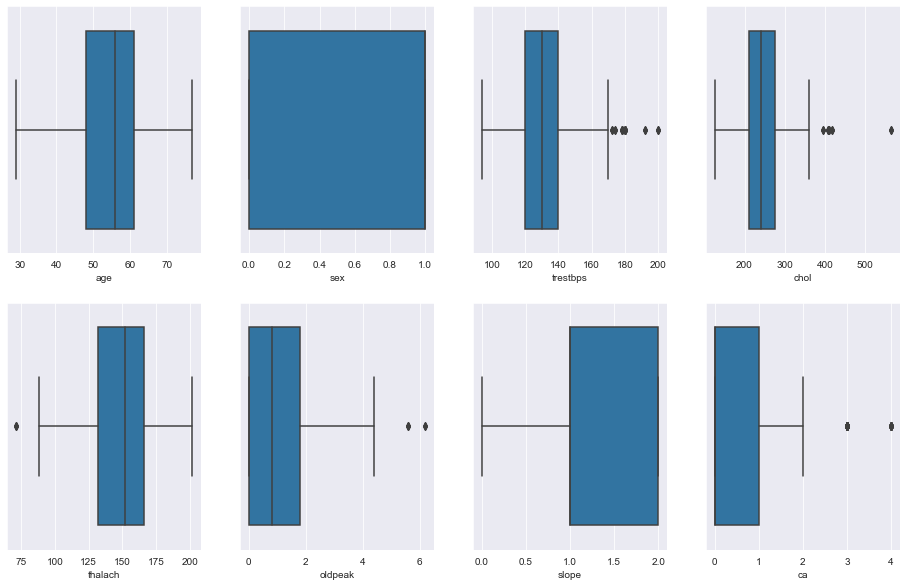

In [9]:
plt.figure(figsize=(16, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

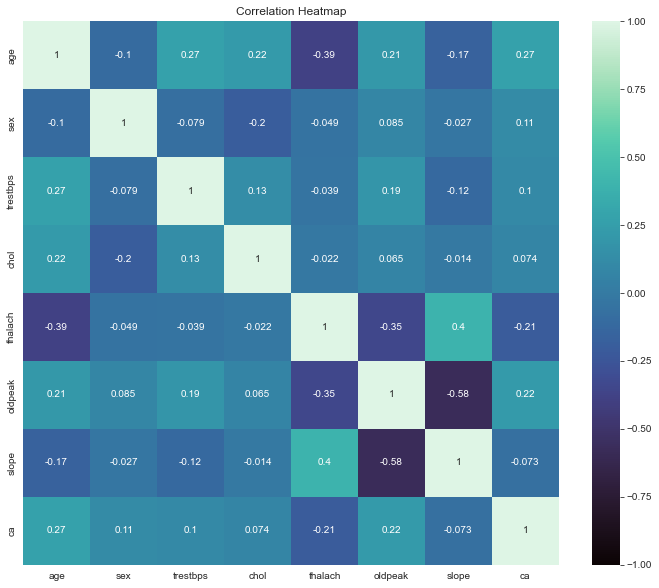

In [10]:
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

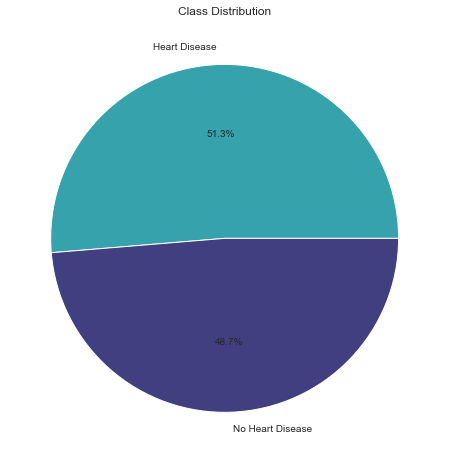

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

# Preprocessing

In [12]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [13]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['cp', 'slope', 'thal']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL', 'TH'])))
    
    # Split df into X and y
    y = df['target'].copy()
    X = df.drop('target', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [14]:
X, y = preprocess_inputs(data, RobustScaler())

In [15]:
X

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,-0.307692,0.0,-0.25,-0.437500,0.0,0.0,0.470588,0.0,0.111111,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
1,-0.230769,0.0,0.50,-0.578125,1.0,-1.0,0.088235,1.0,1.277778,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
2,1.076923,0.0,0.75,-1.031250,0.0,0.0,-0.794118,1.0,1.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
3,0.384615,0.0,0.90,-0.578125,0.0,0.0,0.264706,0.0,-0.444444,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
4,0.461538,-1.0,0.40,0.843750,1.0,0.0,-1.352941,0.0,0.611111,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.230769,0.0,0.50,-0.296875,0.0,0.0,0.352941,1.0,-0.444444,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1021,0.307692,0.0,-0.25,0.281250,0.0,-1.0,-0.323529,1.0,1.111111,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
1022,-0.692308,0.0,-1.00,0.546875,0.0,-1.0,-1.000000,1.0,0.111111,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1023,-0.461538,-1.0,-1.00,0.218750,0.0,-1.0,0.205882,0.0,-0.444444,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [17]:
X.idxmax(1)


0            ca
1       oldpeak
2           age
3            ca
4            ca
         ...   
1020      exang
1021    oldpeak
1022      exang
1023       CP_0
1024         ca
Length: 1025, dtype: object

# Training

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.predict(X_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))

Logistic Regression Accuracy: 84.88%


In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_model.predict(X_train)

print("Support Vector Machine Accuracy: {:.2f}%".format(svm_model.score(X_test, y_test) * 100))

Support Vector Machine Accuracy: 94.15%


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
Rclf_model=RandomForestClassifier()

In [23]:
Rclf_model.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
Rclf_model.predict(X_train)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [25]:
Rclf_model.score(X_test, y_test)

1.0

In [26]:
print("The accuracy obtained in Random Forest Classifier is: {:.2f}%".format(Rclf_model.score(X_test, y_test) * 100))

The accuracy obtained in Random Forest Classifier is: 100.00%


In [27]:
import pickle 
pickle.dump(Rclf_model,open("testmodel.pkl","wb"))

In [28]:
model_load = pickle.load(open("testmodel.pkl","rb"))
model_load.predict([[34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1]])

array([0], dtype=int64)

In [37]:
import warnings
warnings.filterwarnings("ignore")

# input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

input_data = (34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1)      #Expected to not have a heart disease
# input_data = (54, 0,132,200,1,0,220,0,4.2,0,0,1,1,1,1,0,1,1,1,1,0)          #Expected to have a heart disease

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Rclf_model.predict(input_data_reshaped)
print(prediction)

# if (prediction[0]== 0):
#   print('The Person does not have a Heart Disease')
# else:
#   print('The Person has Heart Disease')

[0]


In [36]:
l=[]
l.append(input("Enter age: "))   
l.append(input("Enter sex: "))
l.append(input("Enter Chest Pain Type: "))
l.append(input("Enter trestbps: "))
l.append(input("Enter Cholestrol: "))
l.append(input("Enter Fasting blood sugar: "))
l.append(input("Enter Resting electrocardiographic results: "))
l.append(input("Enter Maximum heart rate achieved: "))
l.append(input("Enter Excercise induced angina: "))
l.append(input("Enter ST depression induced: "))
l.append(input("Enter the slope of the peak exercise ST segment"))
l.append(input("Enter number of major vessels (0-3) colored by flourosopy: "))
l.append(input("Enter thal: "))
l=l+[0]*8
input_data_as_numpy_array= np.asarray(l)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Rclf_model.predict(input_data_reshaped)

print("RESULT: ")
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Enter age: 71
Enter sex: 0
Enter Chest Pain Type: 0
Enter trestbps: 112
Enter Cholestrol: 149
Enter Fasting blood sugar: 0
Enter Resting electrocardiographic results: 1
Enter Maximum heart rate achieved: 125
Enter Excercise induced angina: 0
Enter ST depression induced: 1.6
Enter the slope of the peak exercise ST segment1
Enter number of major vessels (0-3) colored by flourosopy: 0
Enter thal: 2
RESULT: 
The Person does not have a Heart Disease


# 